In [35]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
name = None

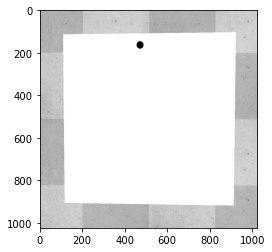

gray


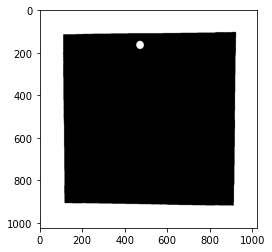

edged


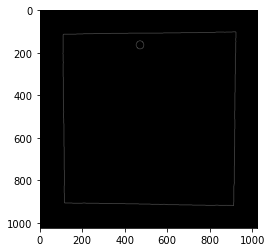

4
iiiiiii
cnts area is 1059.0


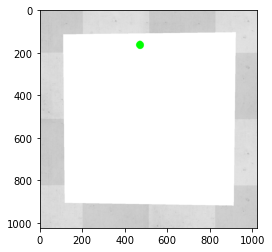

iiiiiii
cnts area is 1077.0


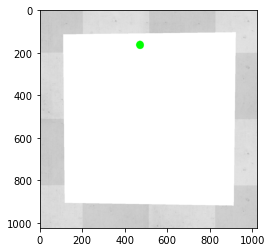

iiiiiii
cnts area is 646102.5


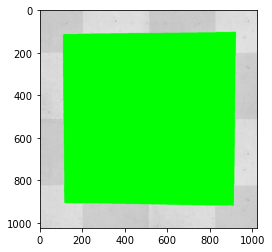

iiiiiii
cnts area is 646105.5


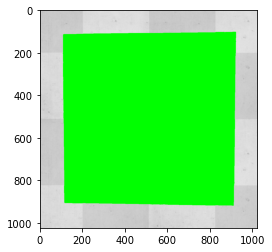

cnts is[[[904 102]]

 [[903 103]]

 [[871 103]]

 [[870 104]]

 [[866 104]]

 [[865 103]]

 [[826 103]]

 [[825 104]]

 [[823 104]]

 [[822 105]]

 [[741 105]]

 [[740 106]]

 [[661 106]]

 [[660 107]]

 [[579 107]]

 [[578 108]]

 [[415 108]]

 [[414 109]]

 [[333 109]]

 [[332 110]]

 [[251 110]]

 [[250 111]]

 [[203 111]]

 [[202 112]]

 [[171 112]]

 [[170 113]]

 [[111 113]]

 [[110 114]]

 [[109 114]]

 [[109 115]]

 [[108 116]]

 [[108 201]]

 [[107 202]]

 [[107 205]]

 [[108 206]]

 [[108 241]]

 [[109 242]]

 [[109 249]]

 [[108 250]]

 [[108 313]]

 [[109 314]]

 [[109 327]]

 [[110 328]]

 [[110 330]]

 [[109 331]]

 [[109 419]]

 [[110 420]]

 [[110 474]]

 [[111 475]]

 [[111 481]]

 [[110 482]]

 [[110 508]]

 [[111 509]]

 [[111 532]]

 [[112 533]]

 [[112 641]]

 [[113 642]]

 [[113 751]]

 [[114 752]]

 [[114 824]]

 [[113 825]]

 [[113 859]]

 [[114 860]]

 [[114 903]]

 [[115 904]]

 [[115 905]]

 [[116 906]]

 [[151 906]]

 [[152 907]]

 [[199 907]]

 [[200 906]]


In [40]:
input_img = cv.imread("1k.png",0)
input_img2 = input_img
plt.imshow(input_img,cmap='gray')
plt.show()
warped_img = None

##############	ADD YOUR CODE HERE	##############
#Conversion into GrayScale
gray = input_img
	

#Applying Gaussian Blur 
print("gray")	
gray = cv.GaussianBlur(gray, (5,5), 2)
ret,thresh1 = cv.threshold(gray,230,255,cv.THRESH_BINARY_INV)
plt.imshow(thresh1,cmap='gray')
plt.show()
	

#Applying Canny Edge Detection
print("edged")
edged = cv.Canny(thresh1, 50, 255)
plt.imshow(edged,cmap='gray')
plt.show()
#Finding Contours
	
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
print(len(cnts))
input_img3 = input_img.copy()

input_img3 = cv.cvtColor(input_img3,cv.COLOR_GRAY2RGB)

for i in range(len(cnts)):
    input_img2=input_img3
    print("iiiiiii")
    area = cv.contourArea(cnts[i])
    print(f"cnts area is {area}")
    cv.drawContours(input_img2, cnts,i, (0, 255, 0), -1) 
    
    plt.imshow(input_img2,cmap='gray')
    plt.show()
	
	
    	
    	


#Sorting the Contours in decreasing order because Square containing the Maze is largest
cnts = sorted(cnts, key = cv.contourArea, reverse = True)


#Looping through the Contours and approxing Contours
for c in cnts:
        print(f"cnts is{c}")
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.05 * peri, True)
	#0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            creenCnt = approx
            break

	# Reshaping Contours for further use
pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
rect = np.zeros((4, 2), dtype = "float32")

#Ordering of points in Clockwise manner

s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]
diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
(tl, tr, br, bl) = rect


	#Finding Maximum width

	
maxWidth = 1280



	#Findinf Maximum height

	
maxHeight = 1280
	#Destination Array of ROI
	

dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")


	#Applying perspective transform
M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
warped_img = cv.warpPerspective(input_img, M, (maxWidth, maxHeight))

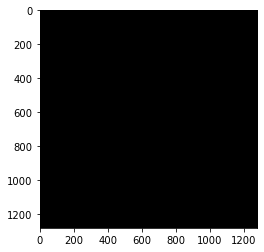

Wall time: 589 ms


In [41]:
%%time
plt.imshow(warped_img,cmap='gray')
cv.imwrite("perspec.png",warped_img)
plt.show()

In [9]:
print(warped_img.shape)

(1280, 1280, 3)
